In [60]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [61]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)
print(Y_train[0])

(60000, 28, 28) (60000,)
5


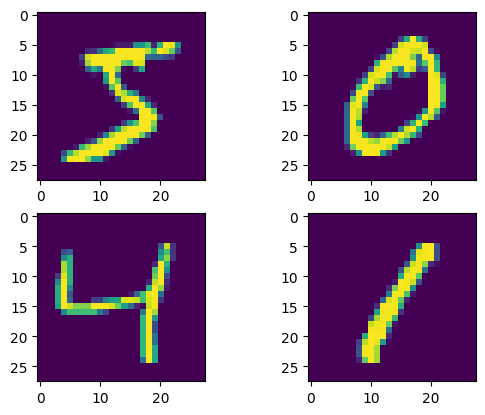

In [75]:
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.imshow(X_train[i-1][:][:])

In [62]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (28, 28, 1)),
    tf.keras.layers.Conv2D(64,(3,3), padding='same'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3), padding='same'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3), padding='same'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(metrics=['accuracy'], optimizer='adam', loss = tf.losses.sparse_categorical_crossentropy)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 3, 3, 64)        

In [64]:
model.fit(x = X_train, y = Y_train, epochs = 5, steps_per_epoch=100)

Epoch 1/5
100/100 [==============================] - 69s 685ms/step - loss: 0.0703 - accuracy: 0.9788
Epoch 2/5
100/100 [==============================] - 64s 635ms/step - loss: 0.0550 - accuracy: 0.9832
Epoch 3/5
100/100 [==============================] - 66s 660ms/step - loss: 0.0355 - accuracy: 0.9886
Epoch 4/5
100/100 [==============================] - 64s 639ms/step - loss: 0.0266 - accuracy: 0.9917
Epoch 5/5
100/100 [==============================] - 62s 622ms/step - loss: 0.0254 - accuracy: 0.9918


In [67]:
solution = model.evaluate(X_test, Y_test)


313/313 [==============================] - 4s 11ms/step - loss: 0.0647 - accuracy: 0.9805
